# trian and error for detecting liner trending

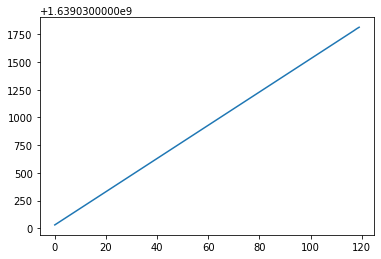

In [38]:

import os
import sys
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

sys.path.append('../')
import lib.metrics
from tsdr import tsdr

# retrieved metrics
filepath = '/datasets/argowf-chaos-hg68n/2021-12-09-argowf-chaos-hg68n-user-db_pod-cpu-hog_0.json'
data_df, _, metrics_meta = tsdr.read_metrics_json(filepath)
series = data_df['c-catalogue_last_seen'].to_numpy()
plt.plot(series)

In [126]:
print(f"{adfuller(series, regression='c')[1]:.10f}") # p_value

0.9982042850


In [136]:
print(f"{adfuller(series, regression='c', maxlag=1, autolag=None)[1]:.10f}") # p_value


1.0000000000


In [130]:
print(f"{adfuller(series, regression='ct', maxlag=1, autolag=None)[1]:.10f}") # p_value

1.0000000000


In [10]:
print(f"{adfuller(series, regression='ctt', maxlag=1, autolag=None)[1]:.10f}") # p_value

1.0000000000


In [12]:
print(f"{adfuller(series, regression='nc', maxlag=1, autolag=None)[1]:.10f}") # p_value

1.0000000000


In [17]:
print(f"{adfuller(series, regression='nc', autolag='AIC')[1]:.10f}") # p_value

0.9803961677


In [127]:
print(f"{adfuller(np.diff(series), regression='c', maxlag=1, autolag=None)[1]:.10f}") # p_value
np.diff(series)

0.0000000000


array([15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15., 15.,
       16., 14.])

In [28]:
from arch.unitroot import ADF, DFGLS
ADF(series, lags=1, trend='ct')

Test Statistic,21.828
P-value,1.000
Lags,1


In [108]:
DFGLS(series, lags=3, trend='ct')

Test Statistic,-1.725
P-value,0.450
Lags,3


In [44]:
import statsmodels.api as sm
print(f"constant: {sm.tsa.kpss(series, regression='c', nlags=1)[1]:.10f}") # p_value
print(f"constant and trend: {sm.tsa.kpss(series, regression='ct', nlags=1)[1]:.10f}") # p_value

constant: 0.0100000000
constant and trend: 0.0844338889


In [103]:
def is_unstational_series(series: np.ndarray,
                          alpha: float,
                          regression: str = 'c',
                          maxlag: int = None,
                          autolag: str = None) -> bool:
    pvalue: float = adfuller(x=series, regression=regression, maxlag=maxlag, autolag=autolag)[1]
    print(f"adf p-val: {pvalue}")
    if not np.isnan(pvalue) and pvalue >= alpha:
        pvalue2: float = sm.tsa.kpss(x=np.diff(series), regression=regression, nlags=maxlag)[1]
        print(f"diff kpss p-val: {pvalue2}")
        if not np.isnan(pvalue2) and pvalue2 < alpha:
            return True
    return False

is_unstational_series(series, regression='ct', alpha=0.01)

adf p-val: 1.0
diff kpss p-val: 0.1


False

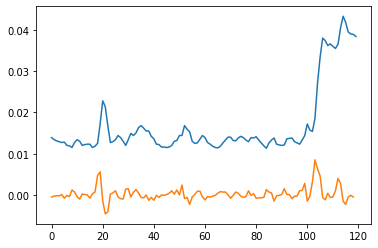

In [104]:
unstational_series = data_df['s-front-end_latency'].to_numpy()
plt.plot(unstational_series)
plt.plot(np.diff(unstational_series))

0.0005704853


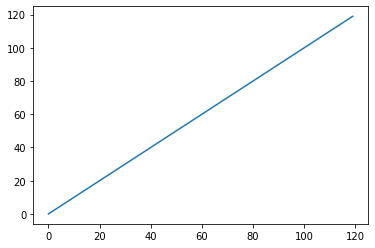

In [151]:
dummy_series = [ i for i in range(120) ]
plt.plot(dummy_series)
print(f"{adfuller(dummy_series, regression='c', maxlag=1)[1]:.10f}") # p_value

1.0000000000


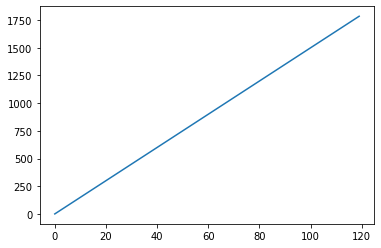

In [152]:
dummy_series = [ i for i in range(0, 15*120, 15) ]
plt.plot(dummy_series)
print(f"{adfuller(dummy_series, regression='c', maxlag=1)[1]:.10f}") # p_value

In [169]:
import statsmodels.api as sm

pval = sm.stats.acorr_ljungbox(np.array(dummy_series), lags=1)[1]
print(f"pval={pval[0]:.50f}") 


pval=0.00000000000000000000000000294271922105104090980648


In [168]:
pval = sm.stats.acorr_ljungbox(series, lags=1)[1]
print(f"pval={pval[0]:.50f}") 

pval=0.00000000000000000000000000294224795471575932164470


In [178]:
pval = sm.stats.acorr_ljungbox(unstational_series, lags=1)[1]
print(f"pval={pval[0]:.50f}") 

pval=0.00000000793365304166180388161456126742271388607719


# Trian and error for trend test

In [179]:
import pymannkendall as mk
mk.original_test(series)

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=16.192969154632337, Tau=1.0, s=7140.0, var_s=194366.66666666666, slope=15.0, intercept=1639030030.0)

In [180]:
mk.original_test(unstational_series)

Mann_Kendall_Test(trend='increasing', h=True, p=1.150641177360967e-05, z=4.3867363590564326, Tau=0.27086834733893556, s=1934.0, var_s=194169.33333333334, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [182]:
mk.regional_test(unstational_series)

Regional_Mann_Kendall_Test(trend='increasing', h=True, p=1.150641177360967e-05, z=4.3867363590564326, Tau=0.27086834733893556, s=1934.0, var_s=194169.33333333334, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [184]:
mk.yue_wang_modification_test(unstational_series)

Modified_Mann_Kendall_Test_Yue_Wang_Approach(trend='no trend', h=False, p=0.10002856450234265, z=1.6447151624516354, Tau=0.27086834733893556, s=1934.0, var_s=1381281.8834427686, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [186]:
mk.pre_whitening_modification_test(unstational_series)

Modified_Mann_Kendall_Test_PreWhitening_Approach(trend='increasing', h=True, p=0.003888474492498073, z=2.8870702104733392, Tau=0.1791767554479419, s=1258.0, var_s=189564.0, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [187]:
mk.trend_free_pre_whitening_modification_test(unstational_series)

Modified_Mann_Kendall_Test_Trend_Free_PreWhitening_Approach(trend='increasing', h=True, p=0.0, z=9.205477996476704, Tau=0.5710012818686797, s=4009.0, var_s=189567.0, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [188]:
mk.multivariate_test(unstational_series)

Multivariate_Mann_Kendall_Test(trend='increasing', h=True, p=1.150641177360967e-05, z=4.3867363590564326, Tau=0.27086834733893556, s=1934.0, var_s=194169.33333333334, slope=2.6429738562091493e-05, intercept=0.011827430555555556)

In [190]:
mk.seasonal_test(unstational_series)

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=5.3441849516389084e-05, z=4.0400410381006315, Tau=0.29074074074074074, s=157.0, var_s=1491.0, slope=0.00033333333333333305, intercept=0.011747222222222225)

In [191]:
import pyhomogeneity as hg

hg.pettitt_test(unstational_series, alpha=0.01)

Pettitt_Test(h=True, cp=99, p=0.0, U=1997.0, avg=mean(mu1=0.013444444444444445, mu2=0.03235238095238095))

In [195]:
hg.pettitt_test(np.diff(series), alpha=0.01)

Pettitt_Test(h=False, cp=118, p=1.0, U=118.0, avg=mean(mu1=15.008474576271187, mu2=14.0))

In [196]:
hg.pettitt_test(np.diff(unstational_series), alpha=0.01)

Pettitt_Test(h=False, cp=84, p=0.8444, U=429.0, avg=mean(mu1=-3.095238095238093e-05, mu2=0.000774285714285714))

In [199]:
diff_series = np.diff(series)
np.std(diff_series) / np.mean(diff_series)

0.008642716314028858

In [200]:
diff_series = np.diff(unstational_series)
np.std(diff_series) / np.mean(diff_series)

8.136402740934242

In [205]:
np.std(unstational_series) / np.mean(unstational_series)

0.5821817364274594

In [ ]:
np.std(dummy_series) / np.mean(dummy_series)